In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Adding treatment feature according to the medication prescribed

In [9]:
#importing diabetes data
data = pd.read_csv('C:/Users/makam/Desktop/Capstone Project/diabetic_data.csv')
data1 = pd.read_csv('C:/Users/makam/Desktop/Capstone Project/diabetic_data.csv')
#Now we label encode the values for the drug columns.
drugs = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
drug_d = pd.DataFrame()
for x in drugs:
    del data1[x]
    drug_d[x]=data[x]
    mapping_dict={x:{'No':0,'Down':1,'Steady':1,'Up':1}}
    drug_d.replace(mapping_dict,inplace=True)
    
#One hot encoding other columns in diabetes data
cont = pd.get_dummies(data1['max_glu_serum'],prefix='max_glu_serum',drop_first=False)
#Adding the results to the master dataframe
data1 = pd.concat([data1,cont],axis=1)
del data1['max_glu_serum']

cont = pd.get_dummies(data1['A1Cresult'],prefix='A1Cresult',drop_first=False)
#Adding the results to the master dataframe
data1 = pd.concat([data1,cont],axis=1)
del data1['A1Cresult']

cont = pd.get_dummies(data1['change'],prefix='change',drop_first=False)
#Adding the results to the master dataframe
data1 = pd.concat([data1,cont],axis=1)
del data1['change']


data1['diabetesMed'].replace({'No':0,'Yes':1},inplace=True)

cont = pd.get_dummies(data1['readmitted'],prefix='readmitted',drop_first=False)
#Adding the results to the master dataframe
data1 = pd.concat([data1,cont],axis=1)
del data1['readmitted']


#We will now check which encounters are having combination of insulin & which are having solo insulin treatment.
drug_d['encounter_id']=data['encounter_id']
ids = data['encounter_id']
ids1 = pd.DataFrame(ids)
ids1['key'] = ids1.index
drug_dt=drug_d.T
insulin_data = drug_d['insulin']
drug_dt.drop(['insulin'],inplace=True)
cols = drug_dt.columns.values.tolist()
drug_dt.drop(['encounter_id'],inplace=True)
no_combo=[]
combo=[]
for x in cols:
    if(drug_dt[x].sum()==0):
        no_combo.append(x)
    else:
        combo.append(x)
combo1 = pd.DataFrame(combo)
combo1.rename(columns={0:'key'},inplace=True)
combo2 = pd.merge(combo1,ids1,on='key',how='inner')
del combo2['key']
no_combo1 = pd.DataFrame(no_combo)
no_combo1.rename(columns={0:'key'},inplace=True)
no_combo2 = pd.merge(no_combo1,ids1,on='key',how='inner')
del no_combo2['key']
ins_data=pd.DataFrame(insulin_data,columns=['insulin'])
ins_data['encounter_id']=data['encounter_id']
combo3 = pd.merge(combo2,ins_data,on='encounter_id',how='inner')
no_combo3 = pd.merge(no_combo2,ins_data,on='encounter_id',how='inner')
no_diabetes = no_combo3[no_combo3['insulin']==0]
type1 = no_combo3[no_combo3['insulin']!=0]
type2 = combo3[combo3['insulin']==0]
t1t2 = combo3[combo3['insulin']!=0]


no_diabetes['treatment']=0
type1['treatment']=1
type2['treatment']=0
t1t2['treatment']=1


diabetes = pd.merge(drug_d,data1,on='encounter_id',how='inner')



#Reading pateint data & one hot encoding the features.
patient_data = pd.read_excel('C:/Users/makam/Desktop/Capstone Project/Paitent_details.xlsx')

df1 = pd.merge(patient_data,data,on='encounter_id',how='inner')

patient_data['race'].replace({'?':'Other'},inplace=True)

cont = pd.get_dummies(patient_data['race'],prefix='race',drop_first=False)
#Adding the results to the master dataframe
patient_data = pd.concat([patient_data,cont],axis=1)
del patient_data['race']

cont = pd.get_dummies(patient_data['gender'],prefix='gender',drop_first=False)
#Adding the results to the master dataframe
patient_data = pd.concat([patient_data,cont],axis=1)
del patient_data['gender']


patient_data['age'].replace({'[70-80)':7,'[60-70)':6,'[50-60)':5,'[80-90)':8,'[40-50)':4,'[30-40)':3,'[90-100)':9,'[20-30)':2,'[10-20)':1,'[0-10)':0},inplace=True)
del patient_data['weight']
final_diabetes = pd.merge(patient_data,diabetes,on='encounter_id',how='inner')
ndc = pd.merge(no_diabetes['encounter_id'],final_diabetes,on='encounter_id',how='inner')
t1 = pd.merge(type1['encounter_id'],final_diabetes,on='encounter_id',how='inner')
t2= pd.merge(type2['encounter_id'],final_diabetes,on='encounter_id',how='inner')
t12 = pd.merge(t1t2['encounter_id'],final_diabetes,on='encounter_id',how='inner')

ndc['treatment']=0
t1['treatment']=1
t2['treatment']=0
t12['treatment']=1

NDC = pd.merge(no_diabetes[['encounter_id','treatment']],df1,on='encounter_id',how='inner')
T1 = pd.merge(type1[['encounter_id','treatment']],df1,on='encounter_id',how='inner')
T2= pd.merge(type2[['encounter_id','treatment']],df1,on='encounter_id',how='inner')
T12 = pd.merge(t1t2[['encounter_id','treatment']],df1,on='encounter_id',how='inner')

diabetes = pd.concat([t1,t2,t12])
org_diabetes = pd.concat([NDC,T1,T2,T12])
org_diabetes['race'].replace({'?':'Other'},inplace=True)
#We can now delete all the drug columns as we have captured the data in treatment column.
for x in drugs:
    del diabetes[x]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

# We will now merge admission details data

In [10]:
d = pd.read_excel('C:/Users/makam/Desktop/Capstone Project/admission_details.xlsx')
del d['patient_nbr']
org_diabetes1 = pd.merge(org_diabetes,d,on='encounter_id',how='inner')
#We will do label encoding for the columns.
d['payer_code'].replace({'?':'Others'},inplace=True)
d['medical_specialty'].replace({'?':'Others'},inplace=True)

cont = pd.get_dummies(d['payer_code'],prefix='payer_code',drop_first=False)
#Adding the results to the master dataframe
d = pd.concat([d,cont],axis=1)
del d['payer_code']

del d['medical_specialty']

cont = pd.get_dummies(d['admission_type_id'],prefix='admission_type_id',drop_first=False)
#Adding the results to the master dataframe
d = pd.concat([d,cont],axis=1)
del d['admission_type_id']

cont = pd.get_dummies(d['discharge_disposition_id'],prefix='discharge_disposition_id',drop_first=False)
#Adding the results to the master dataframe
d = pd.concat([d,cont],axis=1)
del d['discharge_disposition_id']

cont = pd.get_dummies(d['admission_source_id'],prefix='admission_source_id',drop_first=False)
#Adding the results to the master dataframe
d = pd.concat([d,cont],axis=1)
del d['admission_source_id']


diabetes1 = pd.merge(diabetes,d,on='encounter_id',how='inner')

# Merging lab session data

In [11]:
d1 = pd.read_excel('C:/Users/makam/Desktop/Capstone Project/Lab-session.xlsx')
diabetes2 = pd.merge(diabetes1,d1,on='encounter_id',how='inner')
org_diabetes2 = pd.merge(org_diabetes1,d1,on='encounter_id',how='inner')

# Merging diagnosis session data

In [12]:
dig_d = pd.read_excel('C:/Users/makam/Desktop/Capstone Project/Diagnosis_session.xlsx')
'''
er = pd.concat([dig_d['diag_1'],dig_d['diag_2'],dig_d['diag_3']],axis=0).tolist()
y = 0
for x in er:
    er[y] = str(x)
    y = y+1
er1 = pd.DataFrame(er)
l = LabelEncoder()
l.fit(er1[0])
y = 0
l1 = dig_d['diag_1'].tolist()
l2 = dig_d['diag_2'].tolist()
l3 = dig_d['diag_3'].tolist()
for x in l1:
    l1[y] = str(x)
    y = y+1
y = 0
for x in l2:
    l2[y] = str(x)
    y = y+1
y = 0
for x in l3:
    l3[y] = str(x)
    y = y+1
m1 = l.transform(l1).tolist()
m2 = l.transform(l2).tolist()
m3 = l.transform(l3).tolist()
dig_d['diag_1']=m1
dig_d['diag_2']=m2
dig_d['diag_3']=m3
del dig_d['patient_nbr']
'''
df = pd.merge(diabetes2,dig_d[['encounter_id','number_diagnoses']],on='encounter_id',how='inner')
org_diabetes3 = pd.merge(org_diabetes2,dig_d[['encounter_id','number_diagnoses']],on='encounter_id',how='inner')

In [6]:
df.columns.values

array(['encounter_id', 'patient_nbr', 'age', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'gender_Female', 'gender_Male', 'gender_Unknown/Invalid',
       'diabetesMed', 'max_glu_serum_>200', 'max_glu_serum_>300',
       'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>7',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'change_Ch',
       'change_No', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO',
       'treatment', 'time_in_hospital', 'payer_code_BC', 'payer_code_CH',
       'payer_code_CM', 'payer_code_CP', 'payer_code_DM', 'payer_code_FR',
       'payer_code_HM', 'payer_code_MC', 'payer_code_MD', 'payer_code_MP',
       'payer_code_OG', 'payer_code_OT', 'payer_code_Others',
       'payer_code_PO', 'payer_code_SI', 'payer_code_SP', 'payer_code_UN',
       'payer_code_WC', 'admission_type_id_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_type_id_4',
       'admission_type_id_5', 'adm

In [13]:
df.shape

(78363, 103)

Text(0.5, 1.0, 'Distribution of Treatment')

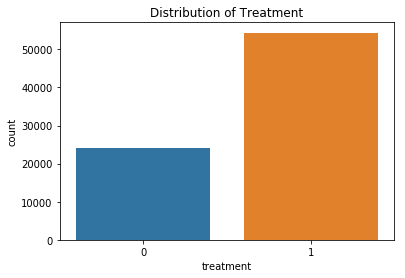

In [8]:
# Distribution of Readmission 
sns.countplot(df['treatment']).set_title('Distribution of Treatment')

Text(0.5, 1.0, 'Age of Patient VS. Treatment')

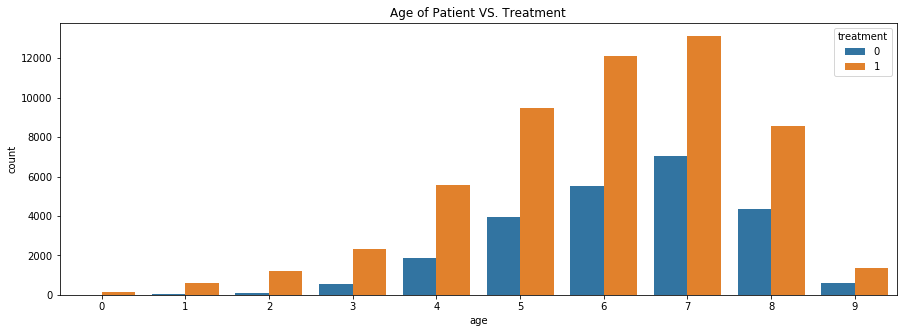

In [10]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x= df['age'], hue = df['treatment']).set_title('Age of Patient VS. Treatment')

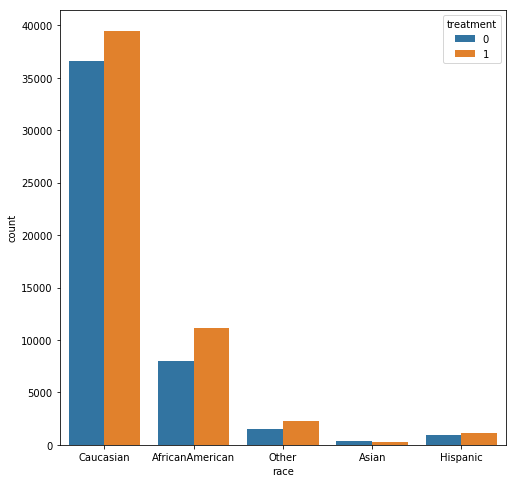

In [65]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = org_diabetes['race'], hue = org_diabetes['treatment'])

Text(0.5, 1.0, 'Number of medication used VS. Treatment')

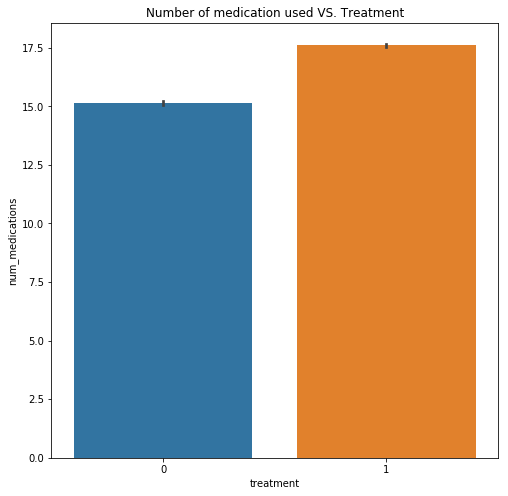

In [47]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['treatment'], y = (df['num_medications'])).set_title("Number of medication used VS. Treatment")

Text(0.5, 1.0, 'Glucose test serum test result VS. Treatment')

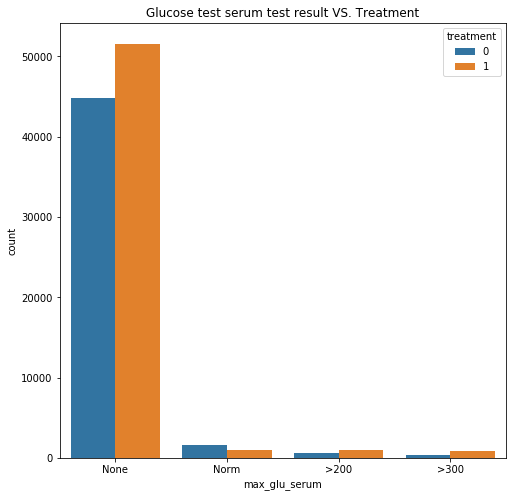

In [14]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = org_diabetes['max_glu_serum'], hue = org_diabetes['treatment']).set_title('Glucose test serum test result VS. Treatment')                                                                                                                                                                                                         

Text(0.5, 1.0, 'A1C test result VS. Treatment')

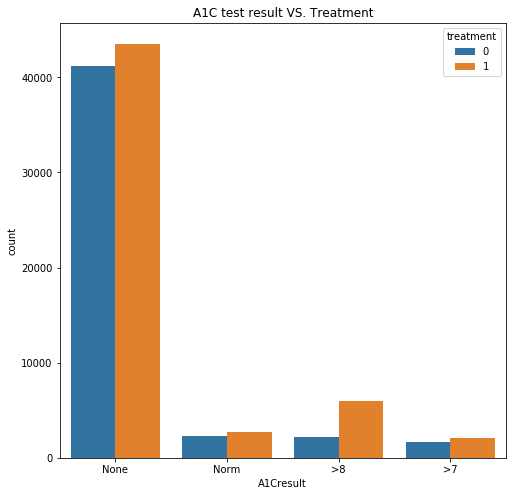

In [16]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x= org_diabetes['A1Cresult'], hue = org_diabetes['treatment']).set_title('A1C test result VS. Treatment')

Text(0.5, 1.0, 'readmission VS. Treatment')

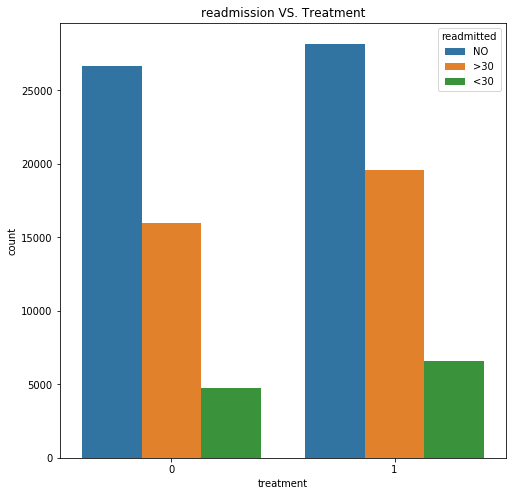

In [17]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x= org_diabetes['treatment'], hue = org_diabetes['readmitted']).set_title('readmission VS. Treatment')

Text(0.5, 1.0, 'Number of lab procedure VS. Treatment')

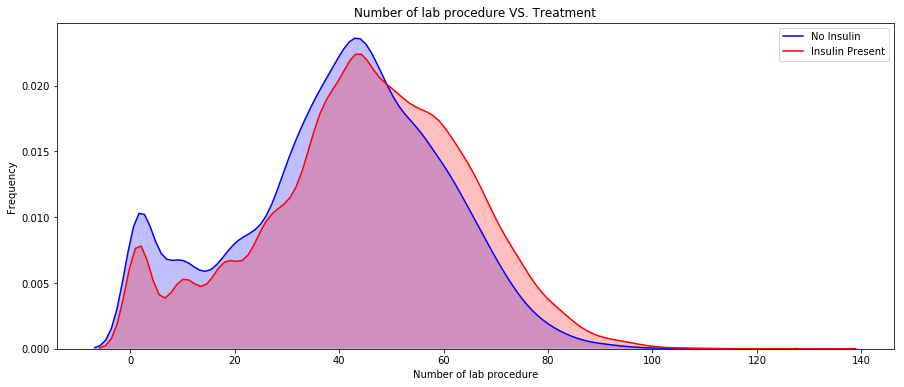

In [14]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['treatment'] == 0),'num_lab_procedures'] , color='b',shade=True,label='No Insulin')
ax=sns.kdeplot(df.loc[(df['treatment'] == 1),'num_lab_procedures'] , color='r',shade=True, label='Insulin Present')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Treatment')

Text(0.5, 1.0, 'Time in Hospital VS. Treatment')

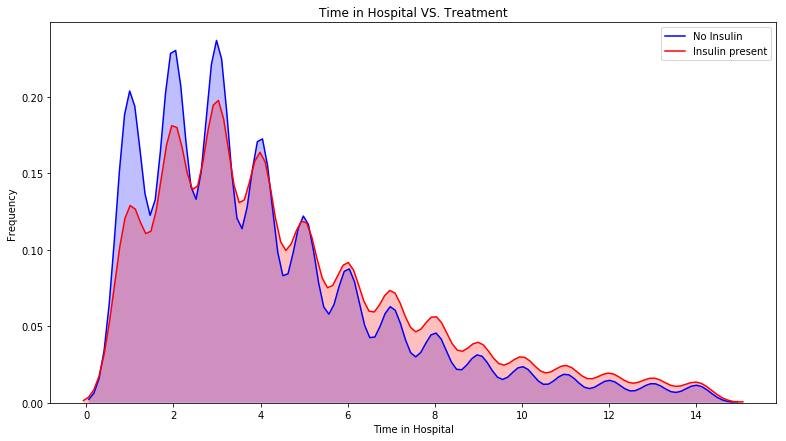

In [15]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['treatment'] == 0),'time_in_hospital'] , color='b',shade=True,label='No Insulin')
ax=sns.kdeplot(df.loc[(df['treatment'] == 1),'time_in_hospital'] , color='r',shade=True, label='Insulin present')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Treatment')

Text(0.5, 1.0, 'number_diagnoses VS. Treatment')

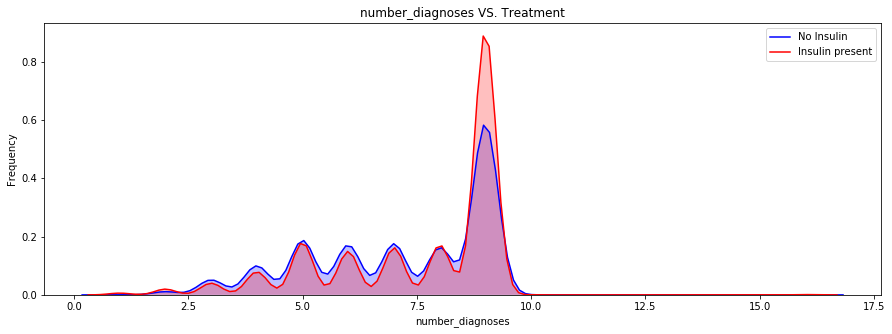

In [16]:
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(df.loc[(df['treatment'] == 0),'number_diagnoses'] , color='b',shade=True,label='No Insulin')
ax=sns.kdeplot(df.loc[(df['treatment'] == 1),'number_diagnoses'] , color='r',shade=True, label='Insulin present')
ax.set(xlabel='number_diagnoses', ylabel='Frequency')
plt.title('number_diagnoses VS. Treatment')

Text(0.5, 1.0, 'num_medications VS. Treatment')

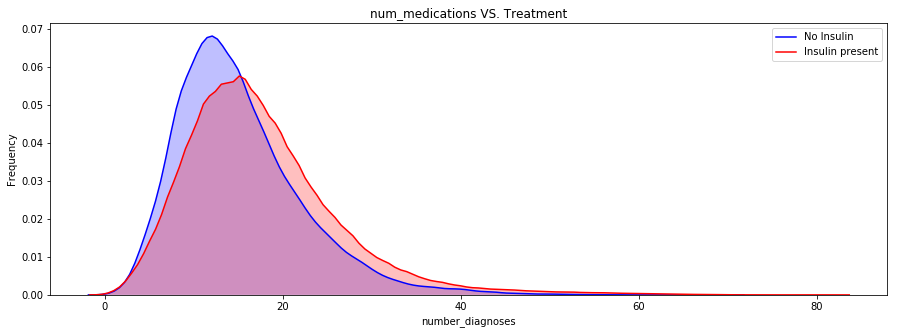

In [17]:
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(df.loc[(df['treatment'] == 0),'num_medications'] , color='b',shade=True,label='No Insulin')
ax=sns.kdeplot(df.loc[(df['treatment'] == 1),'num_medications'] , color='r',shade=True, label='Insulin present')
ax.set(xlabel='number_diagnoses', ylabel='Frequency')
plt.title('num_medications VS. Treatment')

Text(0.5, 1.0, 'number_diagnoses VS. Treatment')

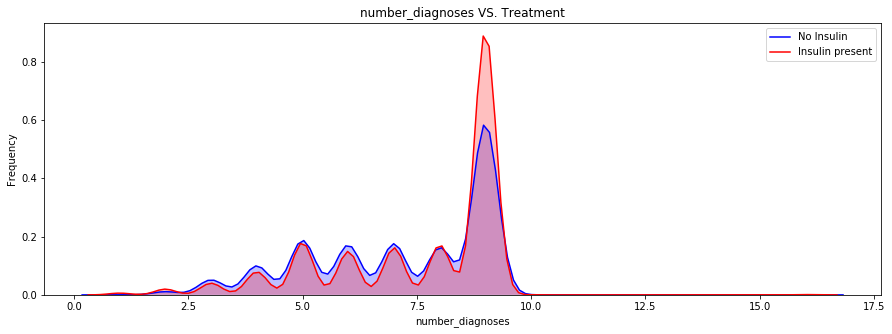

In [18]:
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(df.loc[(df['treatment'] == 0),'number_diagnoses'] , color='b',shade=True,label='No Insulin')
ax=sns.kdeplot(df.loc[(df['treatment'] == 1),'number_diagnoses'] , color='r',shade=True, label='Insulin present')
ax.set(xlabel='number_diagnoses', ylabel='Frequency')
plt.title('number_diagnoses VS. Treatment')

In [25]:
df.columns.values

array(['encounter_id', 'patient_nbr', 'age', 'race_?',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'gender_Female', 'gender_Male',
       'gender_Unknown/Invalid', 'diabetesMed', 'max_glu_serum_>200',
       'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm',
       'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm',
       'change_Ch', 'change_No', 'readmitted_<30', 'readmitted_>30',
       'readmitted_NO', 'treatment', 'time_in_hospital', 'payer_code_BC',
       'payer_code_CH', 'payer_code_CM', 'payer_code_CP', 'payer_code_DM',
       'payer_code_FR', 'payer_code_HM', 'payer_code_MC', 'payer_code_MD',
       'payer_code_MP', 'payer_code_OG', 'payer_code_OT',
       'payer_code_Others', 'payer_code_PO', 'payer_code_SI',
       'payer_code_SP', 'payer_code_UN', 'payer_code_WC',
       'admission_type_id_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_type_id_4',
       'admission

# Performing chi-square analysis to identify imp features

In [9]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [10]:
cT = ChiSquare(df)
#Feature Selection
testColumns = diabetes2.columns.values.tolist()
testColumns.remove('treatment')

In [11]:
for var in testColumns:
    cT.TestIndependence(colX=var,colY="treatment" )

encounter_id is NOT an important predictor. (Discard encounter_id from model)
patient_nbr is IMPORTANT for Prediction
age is IMPORTANT for Prediction
race_AfricanAmerican is IMPORTANT for Prediction
race_Asian is IMPORTANT for Prediction
race_Caucasian is IMPORTANT for Prediction
race_Hispanic is NOT an important predictor. (Discard race_Hispanic from model)
race_Other is IMPORTANT for Prediction
gender_Female is IMPORTANT for Prediction
gender_Male is IMPORTANT for Prediction
gender_Unknown/Invalid is NOT an important predictor. (Discard gender_Unknown/Invalid from model)
diabetesMed is NOT an important predictor. (Discard diabetesMed from model)
max_glu_serum_>200 is IMPORTANT for Prediction
max_glu_serum_>300 is IMPORTANT for Prediction
max_glu_serum_None is IMPORTANT for Prediction
max_glu_serum_Norm is IMPORTANT for Prediction
A1Cresult_>7 is NOT an important predictor. (Discard A1Cresult_>7 from model)
A1Cresult_>8 is IMPORTANT for Prediction
A1Cresult_None is IMPORTANT for Predi

In [19]:
list = ['encounter_id','patient_nbr',
       'race_Hispanic', 
       'gender_Unknown/Invalid', 'diabetesMed', 
       'A1Cresult_>7',  'readmitted_>30',
        'payer_code_CP', 
       'payer_code_FR',  'payer_code_OT',
        'payer_code_WC',
        'admission_type_id_4',
        'discharge_disposition_id_2',
       
       'discharge_disposition_id_9', 'discharge_disposition_id_10'
       , 'discharge_disposition_id_12',
        'discharge_disposition_id_16',
       'discharge_disposition_id_17',
       'discharge_disposition_id_19', 'discharge_disposition_id_20',
       'discharge_disposition_id_22', 
       'discharge_disposition_id_24', 
       'discharge_disposition_id_27', 'discharge_disposition_id_28',
        'admission_source_id_6',
       'admission_source_id_8',
        'admission_source_id_10',
       'admission_source_id_11', 'admission_source_id_13',
       'admission_source_id_14','admission_source_id_22',
       'admission_source_id_25']

In [20]:
for x in list:
    del df[x]

In [21]:
df.shape

(78363, 71)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78363 entries, 0 to 78362
Data columns (total 71 columns):
age                            78363 non-null int64
race_AfricanAmerican           78363 non-null uint8
race_Asian                     78363 non-null uint8
race_Caucasian                 78363 non-null uint8
race_Other                     78363 non-null uint8
gender_Female                  78363 non-null uint8
gender_Male                    78363 non-null uint8
max_glu_serum_>200             78363 non-null uint8
max_glu_serum_>300             78363 non-null uint8
max_glu_serum_None             78363 non-null uint8
max_glu_serum_Norm             78363 non-null uint8
A1Cresult_>8                   78363 non-null uint8
A1Cresult_None                 78363 non-null uint8
A1Cresult_Norm                 78363 non-null uint8
change_Ch                      78363 non-null uint8
change_No                      78363 non-null uint8
readmitted_<30                 78363 non-null uint8
readmit

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

# Building base model

# Random Forest Classifier

In [23]:
x = df.drop('treatment',axis=1)
y = df['treatment']

list1 =['num_lab_procedures',             
'num_procedures',            
'num_medications',                
'number_outpatient',          
'number_emergency',            
'number_inpatient',           
'number_diagnoses']


m1 = RandomForestClassifier()
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)

from sklearn.preprocessing import MinMaxScaler
le=MinMaxScaler()
xtrain[['age','num_lab_procedures',             
'num_procedures',            
'num_medications',                
'number_outpatient',          
'number_emergency',            
'number_inpatient',           
'number_diagnoses']]=le.fit_transform(xtrain[['age','num_lab_procedures',             
'num_procedures',            
'num_medications',                
'number_outpatient',          
'number_emergency',            
'number_inpatient',           
'number_diagnoses']])

xtest[['age','num_lab_procedures',             
'num_procedures',            
'num_medications',                
'number_outpatient',          
'number_emergency',            
'number_inpatient',           
'number_diagnoses']]=le.transform(xtest[['age','num_lab_procedures',             
'num_procedures',            
'num_medications',                
'number_outpatient',          
'number_emergency',            
'number_inpatient',           
'number_diagnoses']])




m1.fit(xtrain,ytrain)
y_pred_test= m1.predict(xtest)

Train_Score_rfc = m1.score(xtrain,ytrain)
Test_Score_rfc = accuracy_score(ytest,y_pred_test)

from sklearn.metrics import *
print('Testing set accuracy')
print(accuracy_score(ytest, y_pred_test))
print(confusion_matrix(ytest,y_pred_test))
y_pred_train = m1.predict(xtrain)
print('Training set accuracy')
print(accuracy_score(ytrain, y_pred_train))
print(confusion_matrix(ytrain,y_pred_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarn

Testing set accuracy
0.7272108554170743
[[ 3660  3609]
 [ 2804 13436]]
Training set accuracy
0.9894082473475043
[[16436   275]
 [  306 37837]]


# Decision Tree Classifier

In [24]:
m2 = DecisionTreeClassifier()
m2.fit(xtrain,ytrain)
y_pred_dt=m2.predict(xtest)
Train_Score_dt = m2.score(xtrain,ytrain)
Test_Score_dt = accuracy_score(ytest,y_pred_dt)

print('Training Accuracy :',Train_Score_dt)
print('Testing Accuracy :',Test_Score_dt)
print(classification_report(ytest,y_pred_dt))

Training Accuracy : 0.9999817697888942
Testing Accuracy : 0.6652345910076992
              precision    recall  f1-score   support

           0       0.46      0.47      0.47      7269
           1       0.76      0.75      0.76     16240

   micro avg       0.67      0.67      0.67     23509
   macro avg       0.61      0.61      0.61     23509
weighted avg       0.67      0.67      0.67     23509



# KNeighbor Classifier

In [25]:
#KNeigborsClassifier

m3=KNeighborsClassifier()
m3.fit(xtrain,ytrain)
y_pred_knc=m3.predict(xtest)

Train_Score_knc = m3.score(xtrain,ytrain)
Test_Score_knc = accuracy_score(ytest,y_pred_knc)


print('Training Accuracy is:',Train_Score_knc)
print('Testing Accuracy is:',Test_Score_knc)
print(classification_report(ytest,y_pred_knc))

Training Accuracy is: 0.8002698071243665
Testing Accuracy is: 0.7069207537538815
              precision    recall  f1-score   support

           0       0.53      0.43      0.48      7269
           1       0.77      0.83      0.80     16240

   micro avg       0.71      0.71      0.71     23509
   macro avg       0.65      0.63      0.64     23509
weighted avg       0.69      0.71      0.70     23509



# Naive Bayes Classifier

In [33]:
m4=MultinomialNB()
m4.fit(xtrain,ytrain)
print(m4)
y_pred_bnb=m4.predict(xtest)
Train_Score_bnb = m4.score(xtrain,ytrain)
Test_Score_bnb = accuracy_score(ytest,y_pred_bnb)

print('Training Accuracy :',Train_Score_bnb)
print('Testing Accuracy  :',Test_Score_bnb)
print(classification_report(ytest,y_pred_bnb))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Training Accuracy : 0.7196558136143216
Testing Accuracy  : 0.7216810583180909
              precision    recall  f1-score   support

           0       0.58      0.37      0.45      7269
           1       0.76      0.88      0.81     16240

   micro avg       0.72      0.72      0.72     23509
   macro avg       0.67      0.63      0.63     23509
weighted avg       0.70      0.72      0.70     23509



# Logistic Regression

In [27]:
#Logistic Regression
m5=LogisticRegression()
m5.fit(xtrain,ytrain)
print(m5)
y_pred_lr=m5.predict(xtest)
Train_Score_lr = m5.score(xtrain,ytrain)
Test_Score_lr = accuracy_score(ytest,y_pred_lr)


print('Training Accuracy is:',Train_Score_lr)
print('Testing Accuracy is:',Test_Score_lr)
print(classification_report(ytest,y_pred_lr))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Training Accuracy is: 0.7381959383089656
Testing Accuracy is: 0.7411629588668169
              precision    recall  f1-score   support

           0       0.63      0.39      0.48      7269
           1       0.77      0.90      0.83     16240

   micro avg       0.74      0.74      0.74     23509
   macro avg       0.70      0.64      0.65     23509
weighted avg       0.73      0.74      0.72     23509



# Tuning Base Estimators

# Tuning Random Forest Classifier


In [46]:
parameter={'n_estimators':[10,25,50],'max_depth':[1,5,10],'max_features':[1,2,3],'criterion':['gini','entropy']}
gs = GridSearchCV(m1,parameter,cv=5)
gs.fit(xtrain,ytrain)
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 3,
 'n_estimators': 10}

In [28]:
m1 = RandomForestClassifier(n_estimators=10,max_features=3,max_depth=10,criterion='entropy')
m1.fit(xtrain,ytrain)
print(m1)
y_pred_ttrfc= m1.predict(xtest)

Train_Score_trfc = m1.score(xtrain,ytrain)
Test_Score_trfc = accuracy_score(ytest,y_pred_ttrfc)

from sklearn.metrics import *
print('Testing set accuracy')
print(accuracy_score(ytest, y_pred_ttrfc))
print(confusion_matrix(ytest,y_pred_ttrfc))
y_pred_ttrainrfc = m1.predict(xtrain)
print('Training set accuracy')
print(accuracy_score(ytrain, y_pred_ttrainrfc))
print(confusion_matrix(ytrain,y_pred_ttrainrfc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Testing set accuracy
0.7082393976774852
[[  596  6673]
 [  186 16054]]
Training set accuracy
0.7173405768038794
[[ 1576 15135]
 [  370 37773]]


# Tuning Decision Tree

In [48]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth':[1,5,10],
    'min_samples_leaf':[5,10,15],
    'min_samples_split':[2,3,4],
    'criterion': ["entropy", "gini"]}

#Decision Tree Tuning

# fit tree on training data
tree = GridSearchCV(m2, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(xtrain, ytrain)

KeyboardInterrupt: 

In [39]:
tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

In [29]:
m2 = DecisionTreeClassifier(random_state = 100,criterion= 'gini',max_depth= 10,min_samples_leaf= 15,min_samples_split= 2)
m2.fit(xtrain,ytrain)
y_pred_dttest = m2.predict(xtest)

Train_Score_tdt = m2.score(xtrain,ytrain)
Test_Score_tdt = accuracy_score(ytest,y_pred_dttest)

print('Testing set accuracy')
print(accuracy_score(ytest, y_pred_dttest))
print(confusion_matrix(ytest,y_pred_dttest))
y_pred_dttrain = m2.predict(xtrain)
print('Training set accuracy')
print(accuracy_score(ytrain, y_pred_dttrain))
print(confusion_matrix(ytrain,y_pred_dttrain))

Testing set accuracy
0.7357182355693564
[[ 2876  4393]
 [ 1820 14420]]
Training set accuracy
0.7499179640500236
[[ 7153  9558]
 [ 4160 33983]]


# Tuning KNeighbors Classifier

In [29]:
#Gridsearch CV to find Optimal K value for KNN model
grid = {'n_neighbors':np.arange(1,20)}
    
knn_cv=GridSearchCV(m3,grid,cv=5)
knn_cv.fit(xtrain,ytrain)
 

print("Tuned Hyperparameter k: {}".format(knn_cv.best_params_))

KeyboardInterrupt: 

In [30]:
m3= KNeighborsClassifier(n_neighbors= 13)
m3.fit(xtrain,ytrain)
y_pred_kttest = m3.predict(xtest)

Train_Score_tknc = m3.score(xtrain,ytrain)
Test_Score_tknc = accuracy_score(ytest,y_pred_kttest)

print('Testing set accuracy')
print(accuracy_score(ytest, y_pred_kttest))
print(confusion_matrix(ytest,y_pred_kttest))
y_pred_kttrain = m3.predict(xtrain)
print('Training set accuracy')
print(accuracy_score(ytrain, y_pred_kttrain))
print(confusion_matrix(ytrain,y_pred_kttrain))

Testing set accuracy
0.7241907354630142
[[ 2933  4336]
 [ 2148 14092]]
Training set accuracy
0.7659240894009552
[[ 7939  8772]
 [ 4068 34075]]


# CAT BOOST Classifier

In [18]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
a = org_diabetes3.drop(['age','treatment'],axis=1)
b = org_diabetes3.treatment

In [60]:
cate_features_index = np.where(a.dtypes == object)[0]

In [61]:
from catboost import CatBoostClassifier, Pool,cv
#let us make the catboost model, use_best_model params will make the model prevent overfitting
model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)

In [62]:
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=2]=0.5555555555555556 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [38]:
#show the model test acc, but you have to note that the acc is not the cv acc,
#so recommend to use the cv acc to evaluate your model!
print('the test accuracy is :{:.6f}'.format(accuracy_score(ytest,model.predict(xtest))))
test_score_catboost = accuracy_score(ytest,model.predict(xtest))
print("the train accuracy is :",model.score(xtrain,ytrain))
train_score_catboost = model.score(xtrain,ytrain)

the test accuracy is :0.764133
the train accuracy is : 0.7850111204287745


In [69]:
model.predict(xtest)

array([1., 1., 1., ..., 1., 1., 0.])

In [32]:
Model_Scores=pd.DataFrame({'Models':['Logistic Regression','KNN','Bernauli Naives Bayes','Decision Tree','Random Forest','Tuned Decison Tree','Tuned KNN','Tuned Random Forest'],
             'Training Accuracy':[Train_Score_lr,Train_Score_knc,Train_Score_bnb,Train_Score_dt,Train_Score_rfc,Train_Score_tdt,Train_Score_tknc,Train_Score_trfc],
             'Testing Accuracy':[Test_Score_lr,Test_Score_knc,Test_Score_bnb,Test_Score_dt,Test_Score_rfc,Test_Score_tdt,Test_Score_tknc,Test_Score_trfc]
                })

Model_Scores.sort_values(by=('Testing Accuracy'),ascending=False)

,Models,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.738196,0.741163
5,Tuned Decison Tree,0.749918,0.735718
4,Random Forest,0.989408,0.727211
6,Tuned KNN,0.765924,0.724191
2,Bernauli Naives Bayes,0.708007,0.714280
7,Tuned Random Forest,0.717341,0.708239
1,KNN,0.800270,0.706921
3,Decision Tree,0.999982,0.665235
